# BSc PHYS60022 - Data Science and Machine Learning - Morning Session

This is the notebook for the morning session of the practical test for the FHEQ Level 6 course PHYS60022 - Data Science and Machine Learning for Physics (Spring 2025).

You will need to have the file `CMS_ttbar_data.csv` in the same directory as this notebook.

The questions for the morning session are in this notebook.

<hr style="border:2px solid gray">
<a id='instructions'></a>

# Instructions  [^](#outline)

#### Claim this file

1. Rename this file by adding your CID number to the file name.
1. Add your CID number in the Markdown cell box below.

**To retain anonymity we ask you not to add your name here or to the name of the file.**

#### CID:  02239985

<div style="background-color: #FFEEEC">
    
# INFORMATION FOR ALL QUESTIONS [^](#outline)

### Total marks for this session : 65 

## Background

Your colleagues working on the CMS experiment at CERN have collected a large data sample of proton-proton collisions and would like you to perform some statistical analyses on them. They have provided you with a data file containing all of the data needed for this work.

## The Data

The data that has been provided is in the form of a `.csv` file - `CMS_ttbar_data.csv`, where each row corresponds to one proton-proton collision event. Your colleagues have selected the events to send you based on some simple requirements to make sure that the data is good quality and that the events contain certain particles that are consistent with the reaction $pp\rightarrow t\bar{t}\rightarrow (b\mu\nu_{\mu})(bq\bar{q})$. In these collisions, it is possible to produce pairs of top anti-top quarks ($t\bar{t}$). Each of these top quarks decays quickly to a $b$ quark and a $W$ boson. One of the $W$ bosons decays to a muon ($\mu$) and muon neutrino $\nu_{\mu}$ while the other one decays to a quark and an anti-quark $q\bar{q}$. We will refer to this process as `ttbar` in the rest of this notebook. The Feynman diagram below shows this process,


![](ttbar_diagram.jpg)


In the real data, some of the events will be the reaction shown in the diagram, however, there will also be different backgrounds due to processes that produce the same final particles, but without producing a top anti-top pair.

Alongside the collision data, your colleagues have provided simulated events of the process they are interested in (the `ttbar` process), and other background processes that are expected to be present in the data. 

The `label` column in the dataset indicates whether the event is a real data event or a simulated event, and if the latter which kind of process has been simulated. The table below summarizes this information, 

  
| Data or simulation  | Process         | Label      |
| ---------           | -------         | -------    |
| Real Data           | N/A             | 0          |
| Simulation          | ttbar           | 1          |
| Simulation          | background      | > 1        | 


# Event information 

The different columns in the `.csv` file provide measurements of the kinematic properties of the different particles in the collision event in the form of the elements of particle four-vectors $p_{x},p_{y},p_{z},E$. For example, for the muon, you will find `muon_px, muon_py, muon_pz, muon_E`.

The $b$ and $q$ particles are not easy to reconstruct in a detector like the CMS experiment, but instead, sophisticated clustering algorithms are used to estimate the momentum and energy of those particles. Your CMS colleagues refer to the results of those algorithms as "jets" and the columns `jetX_px, jetX_py, jetX_pz, jetX_E` give the four-momenta for jets in the event (there are a total of four of them, so `X`=1,2,3 or 4). For these jets, there is also a property called `jetX_btag` which corresponds to a probability, calculated using a machine learning algorithm, that the jet originates from  $b$ quark rather than a different quark. 

In experiments like CMS, it is impossible to reconstruct the neutrino, since it doesn't interact before flying all the way through the detector. Instead, we can infer something about its momentum by adding all of the momenta transverse to the proton collision line, from all particles in the event. Since the protons are colliding head on, we expect this momentum to sum to zero. Anything left over indicates the presence of a neutrino. This is called `met` in your dataset.

All momentum and energy quantities are given in units of GeV (i.e natural units where $c=1$). 

Each of the simulated events comes with a weight in the column `weight` that must be accounted for - you can think of a weight being 2 meaning that rather than generating two events, we generate one event and give it the weight of 2 events (don't worry too much about what it means to have fractional weights!). The data events always have a weight of 1. 

<div style="background-color: #FFEEEC">

## Read in the data

Read in the data from the file `CMS_ttbar_data.csv`. You could use the following code:-
```
import pandas as pd    
df = pd.read_csv('CMS_ttbar_data.csv')
```
This code gives a pandas dataframe `df`. 

In [75]:
# Read in the data in this cell
import pandas as pd    
df = pd.read_csv('CMS_ttbar_data.csv')

<div style="background-color: #FFEEEC">

# QUESTION 1 [^](#outline)
    
[TOTAL MARKS 14]

<div style="background-color: #FFEEEC">

## QUESTION 1.1 [^](#outline)

In the data that you have been given,

(i) How many real data events are there and how many simulated events are there? Calculate the sum of weights for the simulated events. 

(ii) For (a) real data events, and (b) for the `ttbar` simulated events separately, calculate the **sample** mean, standard deviation, skew and kurtosis of the following features, 
   * `met` 
   * `muon_E`
   * each `jetX_E` where `X`=1,2,3 or 4

(iii) Based on the values obtained for the sample moments above, do you think any of the features are normally distributed? Is this different for real data events and the `ttbar` simulated events? 

[5 Marks]

In [76]:
#i)

real_data = df[df['label'] == 0]
simulated_data = df[df['label'] > 0]

# Number of events
num_real = len(real_data)
num_simulated = len(simulated_data)

# Sum of weights for simulated events
sum_weights_simulated = simulated_data['weight'].sum()

print(f"Number of real data events: {num_real}")
print(f"Number of simulated events: {num_simulated}")
print(f"Sum of simulated event weights: {sum_weights_simulated}")


Number of real data events: 38319
Number of simulated events: 1075271
Sum of simulated event weights: 45083.04439231091


In [77]:
#ii)

import scipy.stats as stats

# Split real and simulated data
real_data = df[df['label'] == 0]
ttbar_data = df[df['label'] == 1]

features = ['met', 'muon_E', 'jet1_E', 'jet2_E', 'jet3_E', 'jet4_E']

rows = []

# Real data statistics
for feature in features:
    mean = real_data[feature].mean()
    std = real_data[feature].std()
    skewness = stats.skew(real_data[feature])
    kurt = stats.kurtosis(real_data[feature])
    rows.append(["Real Data", feature, mean, std, skewness, kurt])

# Simulated data statistics
for feature in features:
    mean = ttbar_data[feature].mean()
    std = ttbar_data[feature].std()
    skewness = stats.skew(ttbar_data[feature])
    kurt = stats.kurtosis(ttbar_data[feature])
    rows.append(["ttbar Simulated", feature, mean, std, skewness, kurt])

results_df = pd.DataFrame(rows, columns=["Dataset", "Feature", "Mean", "Std Dev", "Skewness", "Kurtosis"])

results_df[['Mean', 'Std Dev', 'Skewness', 'Kurtosis']] = results_df[['Mean', 'Std Dev', 'Skewness', 'Kurtosis']].round(3)

results_df


,Dataset,Feature,Mean,Std Dev,Skewness,Kurtosis
0,Real Data,met,57.240,45.835,2.634,14.282
1,Real Data,muon_E,118.751,91.930,3.087,17.272
2,Real Data,jet1_E,236.041,195.469,3.077,16.311
3,Real Data,jet2_E,167.862,135.226,3.206,18.810
4,Real Data,jet3_E,120.030,86.092,2.515,10.235
5,Real Data,jet4_E,91.050,62.335,2.561,13.406
6,ttbar Simulated,met,67.544,47.339,2.143,9.760
7,ttbar Simulated,muon_E,110.633,79.614,2.800,14.658
8,ttbar Simulated,jet1_E,229.437,186.812,3.455,21.300
9,ttbar Simulated,jet2_E,162.440,119.048,2.978,16.875


iii) Based on the values calculated, none of the features appear to be normally distributed. [1] argues that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7. None of the features in both the real data and simulated data show this. 

[1] https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon

<div style="background-color: #FFEEEC">

## QUESTION 1.2 [^](#outline)

From the Feynman diagram, we should expect to find that three of the jets in each event originate from a top quark. Add a column to your dataframe that contains the invariant mass of this reconstructed top quark. 

To calculate the invariant mass, you need to sum the four-vectors for the first three jets in each event (`X`=1,2 and 3). The four vector for each jet is constructed as (`jetX_E, jetX_px, jetX_py, jetX_pz`) - i.e the energy and 3-momentum of each jet. Remember that the invariant mass $m$ of any four-vector $(E,p_{x},p_y,p_z)$ is calculated as, 
$$
m^{2} = E^{2}-|\vec{p}|^{2}
$$ 

Since the energies and momenta are never perfectly measured in an experiment, you may find $m^{2}<0$ in some cases. Make sure to handle those cases in a suitable way - i.e setting to some default value. 

[4 marks]

In [78]:
import numpy as np

# Calculating the summed values for each event
E_sum = df['jet1_E'] + df['jet2_E'] + df['jet3_E']
px_sum = df['jet1_px'] + df['jet2_px'] + df['jet3_px']
py_sum = df['jet1_py'] + df['jet2_py'] + df['jet3_py']
pz_sum = df['jet1_pz'] + df['jet2_pz'] + df['jet3_pz']

# Calculate the invaraint mass squared
mass_squared = E_sum**2 - (px_sum**2 + py_sum**2 + pz_sum**2)

# Handle cases where the mass squared is negative
mass = np.where(mass_squared > 0, np.sqrt(mass_squared), 0)

# Add and display the new column
df['mass'] = mass
display(df)


,jet4_px,jet4_py,jet4_pz,jet4_E,muon_px,muon_py,muon_pz,muon_E,jet1_px,jet1_py,...,jet3_btag,jet4_btag,met,label,weight,jet1_real_b,jet2_real_b,jet3_real_b,jet4_real_b,mass
0,-34.918785,-5.124993,-80.383133,87.888191,16.063568,-51.804611,88.843781,104.091232,-83.959946,117.371971,...,0.888424,-10.000000,77.293724,0,1.000000,True,True,True,True,372.565867
1,41.456001,2.919595,4.053141,42.427471,-37.588726,8.845344,71.451180,81.218445,-63.565884,-47.020882,...,0.117154,0.121590,30.835620,0,1.000000,True,True,True,True,291.811412
2,52.611359,47.937542,0.527523,72.993332,-24.875471,21.917789,-71.959930,79.230179,168.293228,76.178207,...,0.182753,0.471263,68.385670,0,1.000000,True,True,True,True,987.547562
3,32.240288,-24.518635,177.370346,182.046768,122.184402,-82.512955,85.322105,170.344620,-164.934814,67.428436,...,0.151842,0.128493,97.718040,0,1.000000,True,True,True,True,652.647795
4,23.597258,-36.197281,161.614441,167.387222,-4.139445,33.000866,110.028931,114.945938,111.024330,14.775453,...,0.306123,0.392490,35.087820,0,1.000000,True,True,True,True,863.545151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113585,22.152893,38.013027,-19.374876,49.158909,-46.973728,-31.234287,-219.008026,226.156219,3.751197,-84.342598,...,0.067644,0.081399,42.198654,5,1.653047,True,False,False,False,263.416579
1113586,28.673819,12.435043,46.907146,56.763237,15.579427,45.364594,-66.853745,82.280609,44.344913,-60.471786,...,-10.000000,0.177686,60.273470,5,1.653047,False,True,False,False,203.461512
1113587,18.748297,-28.141184,11.475047,36.142059,21.707230,37.138432,-122.860336,130.173508,-106.957199,88.971291,...,0.767361,0.309777,43.750618,5,1.653047,True,False,True,False,278.203416
1113588,47.468079,-3.730394,-13.734015,50.616013,-35.799210,-8.786809,102.359688,108.794800,-55.227745,33.359329,...,-10.000000,0.137408,10.831671,5,1.653047,False,False,False,False,297.726188


<div style="background-color: #FFEEEC">

## QUESTION 1.3 [^](#outline)

For each feature, including your new invariant mass, show your data as a 1D histogram, where the height of each bin represents a count of events, for the real data and simulated data. You should use the **same binning** for the data and simulation (this binning can be different for each feature).   

Do not make histograms for the following columns in the dataframe `weight, label, jetX_real_b` where `X=1,2,3,4`. 

For each feature, i.e. in each plot, you should **overlay** the histograms for real and simulated data on one set of axes. Every plot should have two histograms. **Remember to account for the weights when creating the histograms**.  You should remove any values that are clearly **default** values in each of your plots.

Make sure that all of your plots are clearly labelled. 

[5 marks]

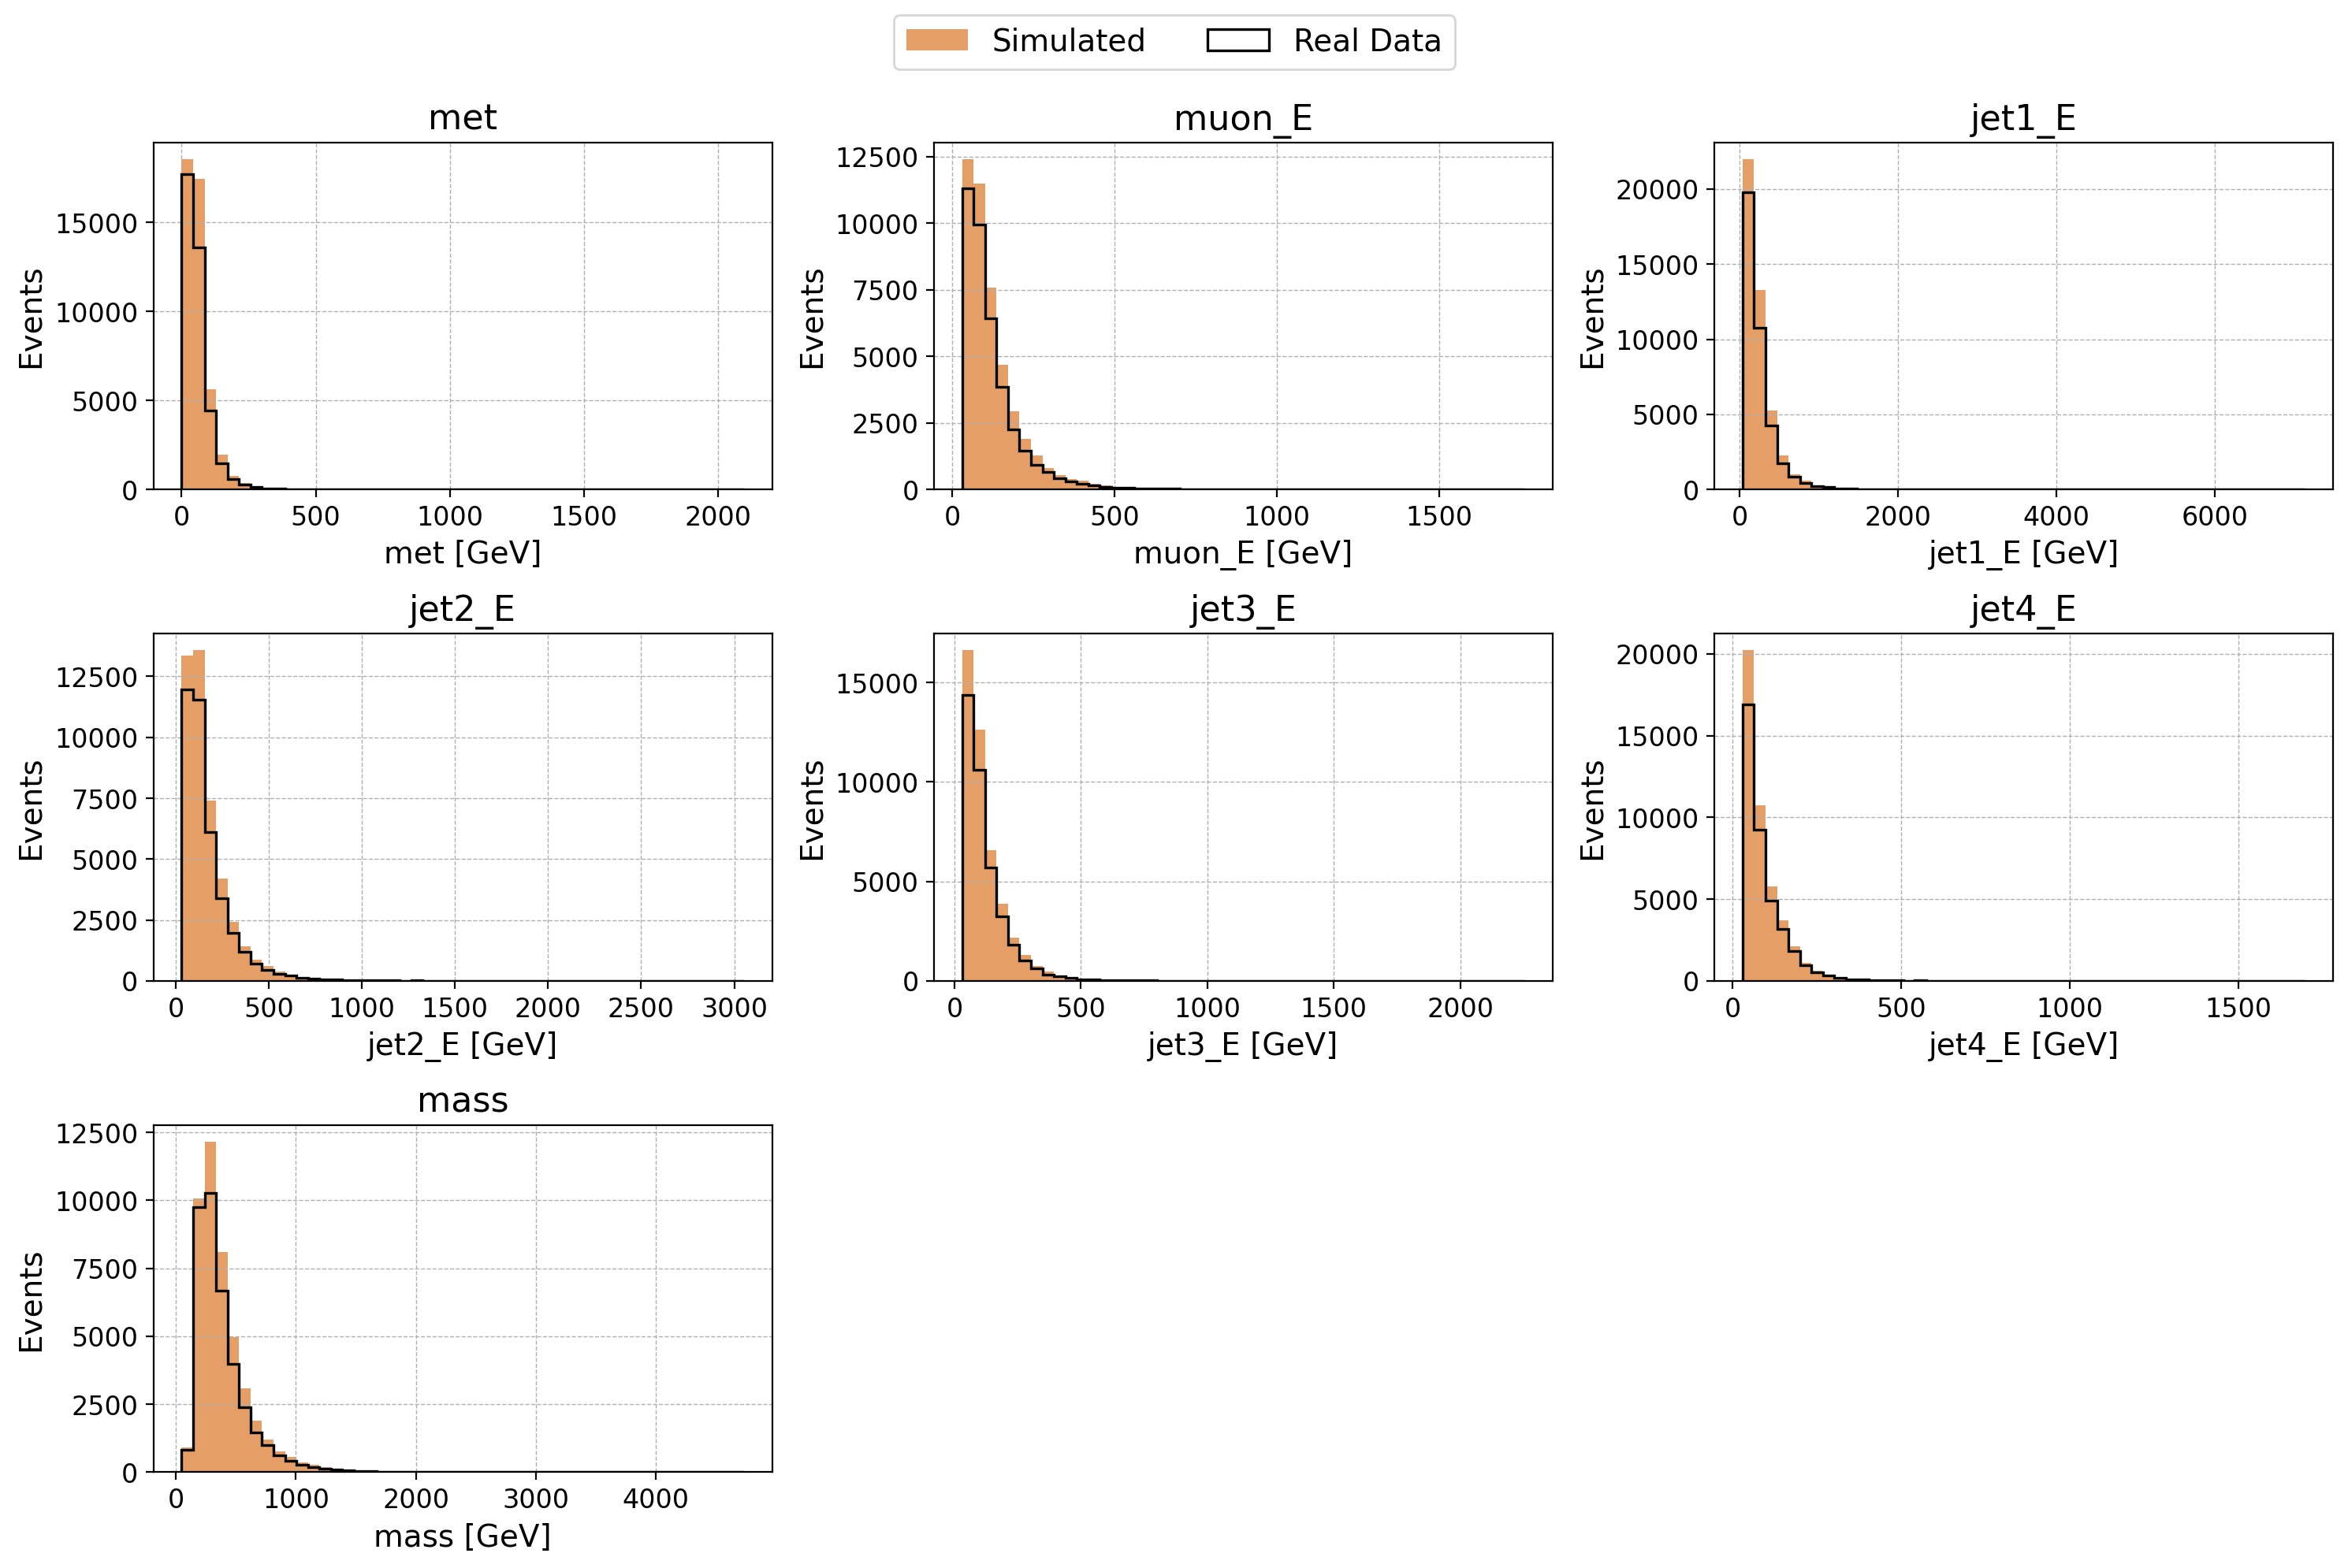

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# List of features to plot
features_to_plot = ['met', 'muon_E', 'jet1_E', 'jet2_E', 'jet3_E', 'jet4_E', 'mass']

# Real and simulated events
real_data = df[df['label'] == 0]
simulated_data = df[df['label'] > 0]

fig, axes = plt.subplots(3, 3, figsize=(15, 10), dpi=200)
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # remove mass = 0 cases
    if feature == 'mass':
        real_features = real_data[real_data['mass'] > 0][feature]
        sim_features = simulated_data[simulated_data['mass'] > 0][feature]
        sim_weights = simulated_data[simulated_data['mass'] > 0]['weight']
    else:
        real_features = real_data[feature]
        sim_features = simulated_data[feature]
        sim_weights = simulated_data['weight']
    
    # Ensure the binning is the same for both histograms
    minval = min(real_features.min(), sim_features.min())
    maxval = max(real_features.max(), sim_features.max())
    bins = np.linspace(minval, maxval, 50)

    ax = axes[i]
    ax.hist(sim_features, bins=bins, weights=sim_weights, alpha=0.6, label="Simulated", color="#D55E00", histtype='stepfilled')
    ax.hist(real_features, bins=bins, histtype='step', color='black', label="Real Data", linewidth=1.2)
    

    # Formatting the plot
    ax.set_xlabel(f"{feature} [GeV]", fontsize=14)
    ax.set_ylabel("Events", fontsize=14)
    ax.set_title(feature, fontsize=16)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)


fig.delaxes(axes[-1])
fig.delaxes(axes[-2])


# Formatting the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=14, ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<hr style="border:2px solid gray">
<a id='q2'></a>

<div style="background-color: #FFEEEC">

# QUESTION 2 [^](#outline)

[Total Marks 18]

<div style="background-color: #FFEEEC">

## QUESTION 2.1 [^](#outline)

Each jet in your data has a feature called `jetX_btag`, which is the score of a machine learning algorithm that has been trained to separate jets that originate from $b$ quarks from other types of jet. For simulated events, each jet also has a feature  called `jetX_real_b` which is 1 for jets that originate from a $b$ quark and 0 otherwise. For some of the jets in each event, the score is set to a default value - make sure to exclude this default value in the answers to this problem (it should be obvious what this default value is). 

(i) Which class of machine learning problem is this algorithm designed to solve? Name three common machine learning algorithms of this class. 

(ii) For all simulated events, create two 1D **density** histograms aggregating all of the `jetX_btag` scores for (a) jets that do originate from a $b$ quark and (b) for all other jets. Overlay the two density histograms on the same axes. You should use the same binning for each histogram.  

(iii) We can think of the score as a test-statistic that is used to determine whether or not the jet originates from a $b$ quark. 

   * (a) If we think of the above as a hypothesis test, what would you identify as the null and alternate hypotheses? 
   * (b) Given your answer to part (a), calculate the values of $\alpha$ (the Type-I error) and $1-\beta$ (the power) of this hypothesis test for different values for the decision boundary on the classifier score. Plot the results in the form of a $\alpha$ vs $(1-\beta)$ curve - make sure you have chosen enough values for the decision boundary to produce a reasonably smooth curve that explores the full curve. 
   * (c) What is the common name given to this curve in machine learning? 

(iv) Using your curve from part (iii) choose a decision boundary on the classifier score so that the sample of jets that are classified as originating from a $b$ quark has a **precision** of close to $95\%$. For this decision boundary, what are the values of $\alpha$ and $1-\beta$, and the exact value of the precision?

(v) Create a new dataframe containing only events with at least two jets that are likely to have originated from a $b$ quark, according to your choice of decision boundary from part (iv).

[15 marks]

i) Binary Classification

<u>Three algorithms:</u>
- k-Nearest Neighbour
- Decision Trees
- Neural Networks

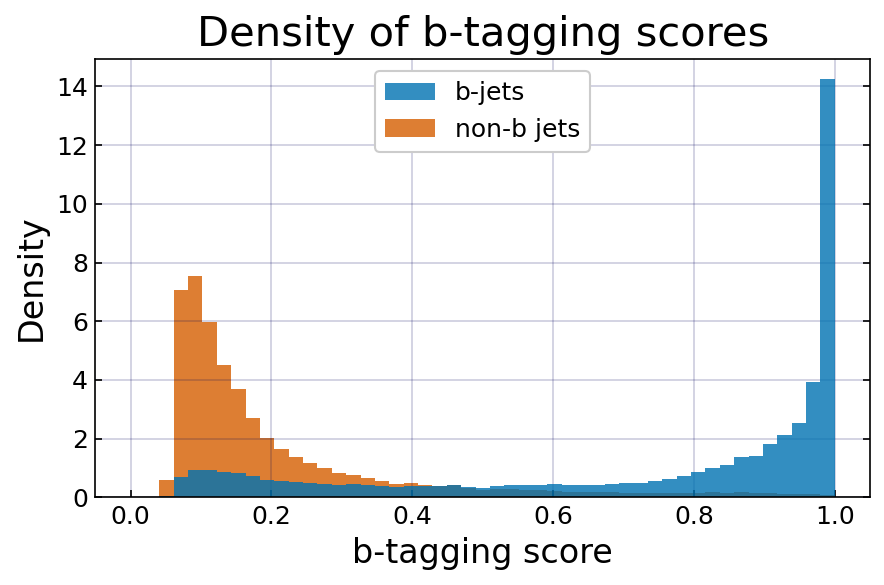

In [80]:
#ii)

from matplotlib.ticker import MultipleLocator

btag_scores_bjets = []
btag_scores_nonbjets = []

for i in range(1, 5):
    btag = simulated_data[f'jet{i}_btag']
    realb = simulated_data[f'jet{i}_real_b']
    
    # Defult is -10 (from looking at dataframe), keep only values greater than this
    mask = btag > -10 
    btag = btag[mask]
    realb = realb[mask]
    
    # Divde into b-jets and non-b-jets
    btag_scores_bjets.extend(btag[realb == 1])
    btag_scores_nonbjets.extend(btag[realb == 0])


# Make the histogram
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
bins = np.linspace(0, 1, 50)
ax.hist(btag_scores_bjets, bins=bins, density=True, alpha=0.8, label='b-jets', color='#0072B2', histtype='stepfilled', zorder=2)
ax.hist(btag_scores_nonbjets, bins=bins, density=True, alpha=0.8, label='non-b jets', color='#D55E00', histtype='stepfilled', zorder=1)
ax.set_xlabel('b-tagging score', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(which='both', labelsize=12, direction='in', top=False, right=True)
ax.grid(color='xkcd:dark blue', alpha=0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.legend(loc='upper center', fontsize=12, framealpha=1)
ax.set_title('Density of b-tagging scores', fontsize=20)
plt.tight_layout()
plt.show()

iii) 

a)

- Null Hypothesis $(H_{0})$: The jet does not originate from a b-quark - it is a background jet.
- Alternate Hypothesis $(H_{1})$: The jet does originate from a b-quark.

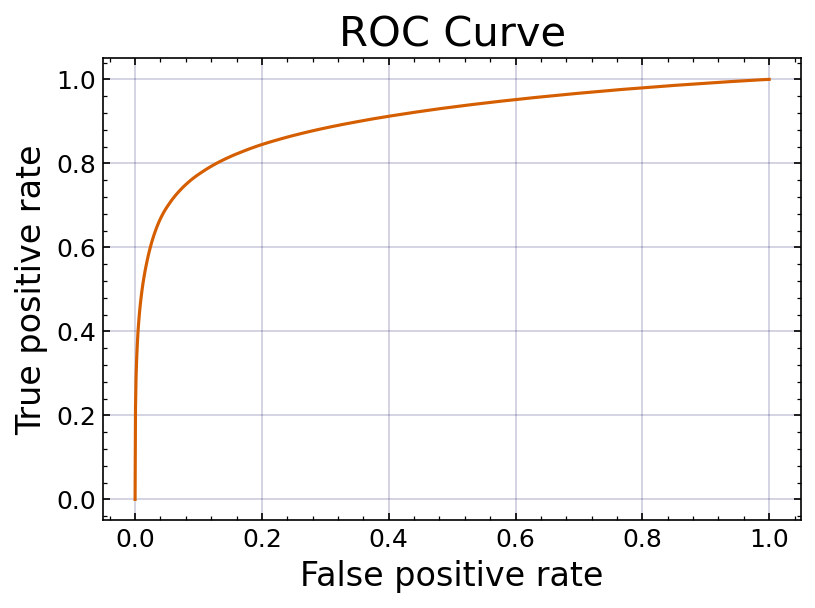

In [81]:
#b)

btag_scores_bjets = np.array(btag_scores_bjets)
btag_scores_nonbjets = np.array(btag_scores_nonbjets)

thresholds = np.linspace(0, 1, 100)
alphas = []
powers = []

for thresh in thresholds:
    alpha = np.sum(btag_scores_nonbjets > thresh) / len(btag_scores_nonbjets)
    power = np.sum(btag_scores_bjets > thresh) / len(btag_scores_bjets)
    alphas.append(alpha)
    powers.append(power)



fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.plot(alphas, powers, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 16)
ax.set_ylabel('True positive rate',fontsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',labelsize = 12, direction='in',top=True,right=True)
ax.set_title('ROC Curve',fontsize = 20)
ax.grid(color='xkcd:dark blue', alpha=0.2)



c) ROC Curve (Receiver-operating characteristic)

In [82]:
# iv)

# Precision defined as TP / (TP + FP)

precisions = []

for t in thresholds:
    TP = np.sum(btag_scores_bjets > t)
    FP = np.sum(btag_scores_nonbjets > t)
    if TP + FP > 0:
        precision = TP / (TP + FP)
    else:
        precision = 0
    precisions.append(precision)


# Find the threshold closest to 95% precision
precisions = np.array(precisions)
target_precision = 0.95
best_idx = np.argmin(np.abs(precisions - target_precision))
best_t = thresholds[best_idx]
best_precision = precisions[best_idx]
best_alpha = alphas[best_idx]
best_power = powers[best_idx]

print(f"Decision Boundary: {best_t:.3f}")
print(f"Exact Precision Value: {best_precision:.3f}")
print(f"α: {best_alpha:.3f}")
print(f"1-β: {best_power:.3f}")


Decision Boundary: 0.808
Exact Precision Value: 0.950
α: 0.026
1-β: 0.610


In [ ]:
#v)

# For each event, count how many jets have btag > best_thresh
jet1_pass = (df['jet1_btag'] > best_t).astype(int)
jet2_pass = (df['jet2_btag'] > best_t).astype(int)
jet3_pass = (df['jet3_btag'] > best_t).astype(int)
jet4_pass = (df['jet4_btag'] > best_t).astype(int)

# Sum across the jets
n_btagged = jet1_pass + jet2_pass + jet3_pass + jet4_pass
df_bjets = df[n_btagged >= 2]

display(df_bjets)


,jet4_px,jet4_py,jet4_pz,jet4_E,muon_px,muon_py,muon_pz,muon_E,jet1_px,jet1_py,...,jet3_btag,jet4_btag,met,label,weight,jet1_real_b,jet2_real_b,jet3_real_b,jet4_real_b,mass
0,-34.918785,-5.124993,-80.383133,87.888191,16.063568,-51.804611,88.843781,104.091232,-83.959946,117.371971,...,0.888424,-10.000000,77.293724,0,1.000000,True,True,True,True,372.565867
10,15.330839,-40.949814,37.882027,58.188560,13.787275,-35.194763,32.370235,49.765484,-9.301529,95.100601,...,0.856191,-10.000000,132.226070,0,1.000000,True,True,True,True,162.700335
18,33.847176,27.815048,-58.532646,73.363617,27.083317,21.583132,-45.284588,57.009144,41.354870,-77.332527,...,0.984449,0.092200,21.699873,0,1.000000,True,True,True,True,256.458874
26,-30.023472,32.612827,40.993332,60.924706,-35.050575,-16.074232,85.643097,93.923775,-88.781906,17.047609,...,0.104924,0.999339,17.330011,0,1.000000,True,True,True,True,245.532492
33,-112.681694,-106.938980,-220.733505,270.578949,-11.236438,-154.969589,-124.312683,198.986145,65.819702,218.026932,...,0.073771,0.993020,139.445330,0,1.000000,True,True,True,True,539.131545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112320,-46.721622,80.958092,325.395813,338.922180,96.755966,182.724930,-264.758026,335.926971,154.060577,-215.583496,...,0.872350,0.463164,22.802002,5,1.653047,True,False,False,True,706.645708
1112321,20.270458,-29.493242,8.722146,37.433044,-46.635735,-2.277639,-79.842316,92.492622,0.748311,96.141792,...,0.184816,0.991541,33.306240,5,1.653047,False,False,False,True,365.957839
1112480,10.815573,31.823195,18.820126,39.362595,4.072248,-34.775421,5.624388,35.462067,-71.879356,-48.646770,...,-10.000000,0.909489,49.340355,5,1.653047,True,False,False,True,321.430743
1112691,-3.642334,-65.481644,130.566849,146.317154,48.268272,7.033488,12.177942,50.275337,-100.433472,147.424667,...,0.818620,0.076574,77.854080,5,1.653047,False,True,True,False,394.158772


<div style="background-color: #FFEEEC">

## Question 2.2

Using your new dataframe from Question 2.1, create a 1D histogram for each feature. The histograms should represent the count of events in each bin. In each plot, you should overlay the histograms for real and simulated data on one set of axes i.e every plot should have two histograms. Remember to account for the weights when creating the histograms. 

You should use the **same binning** for the data and simulation (this binning can be different for each feature).   

Do not make histograms for the following columns in the dataframe `weight, label, jetX_real_b` where `X=1,2,3,4`.

[3 marks]

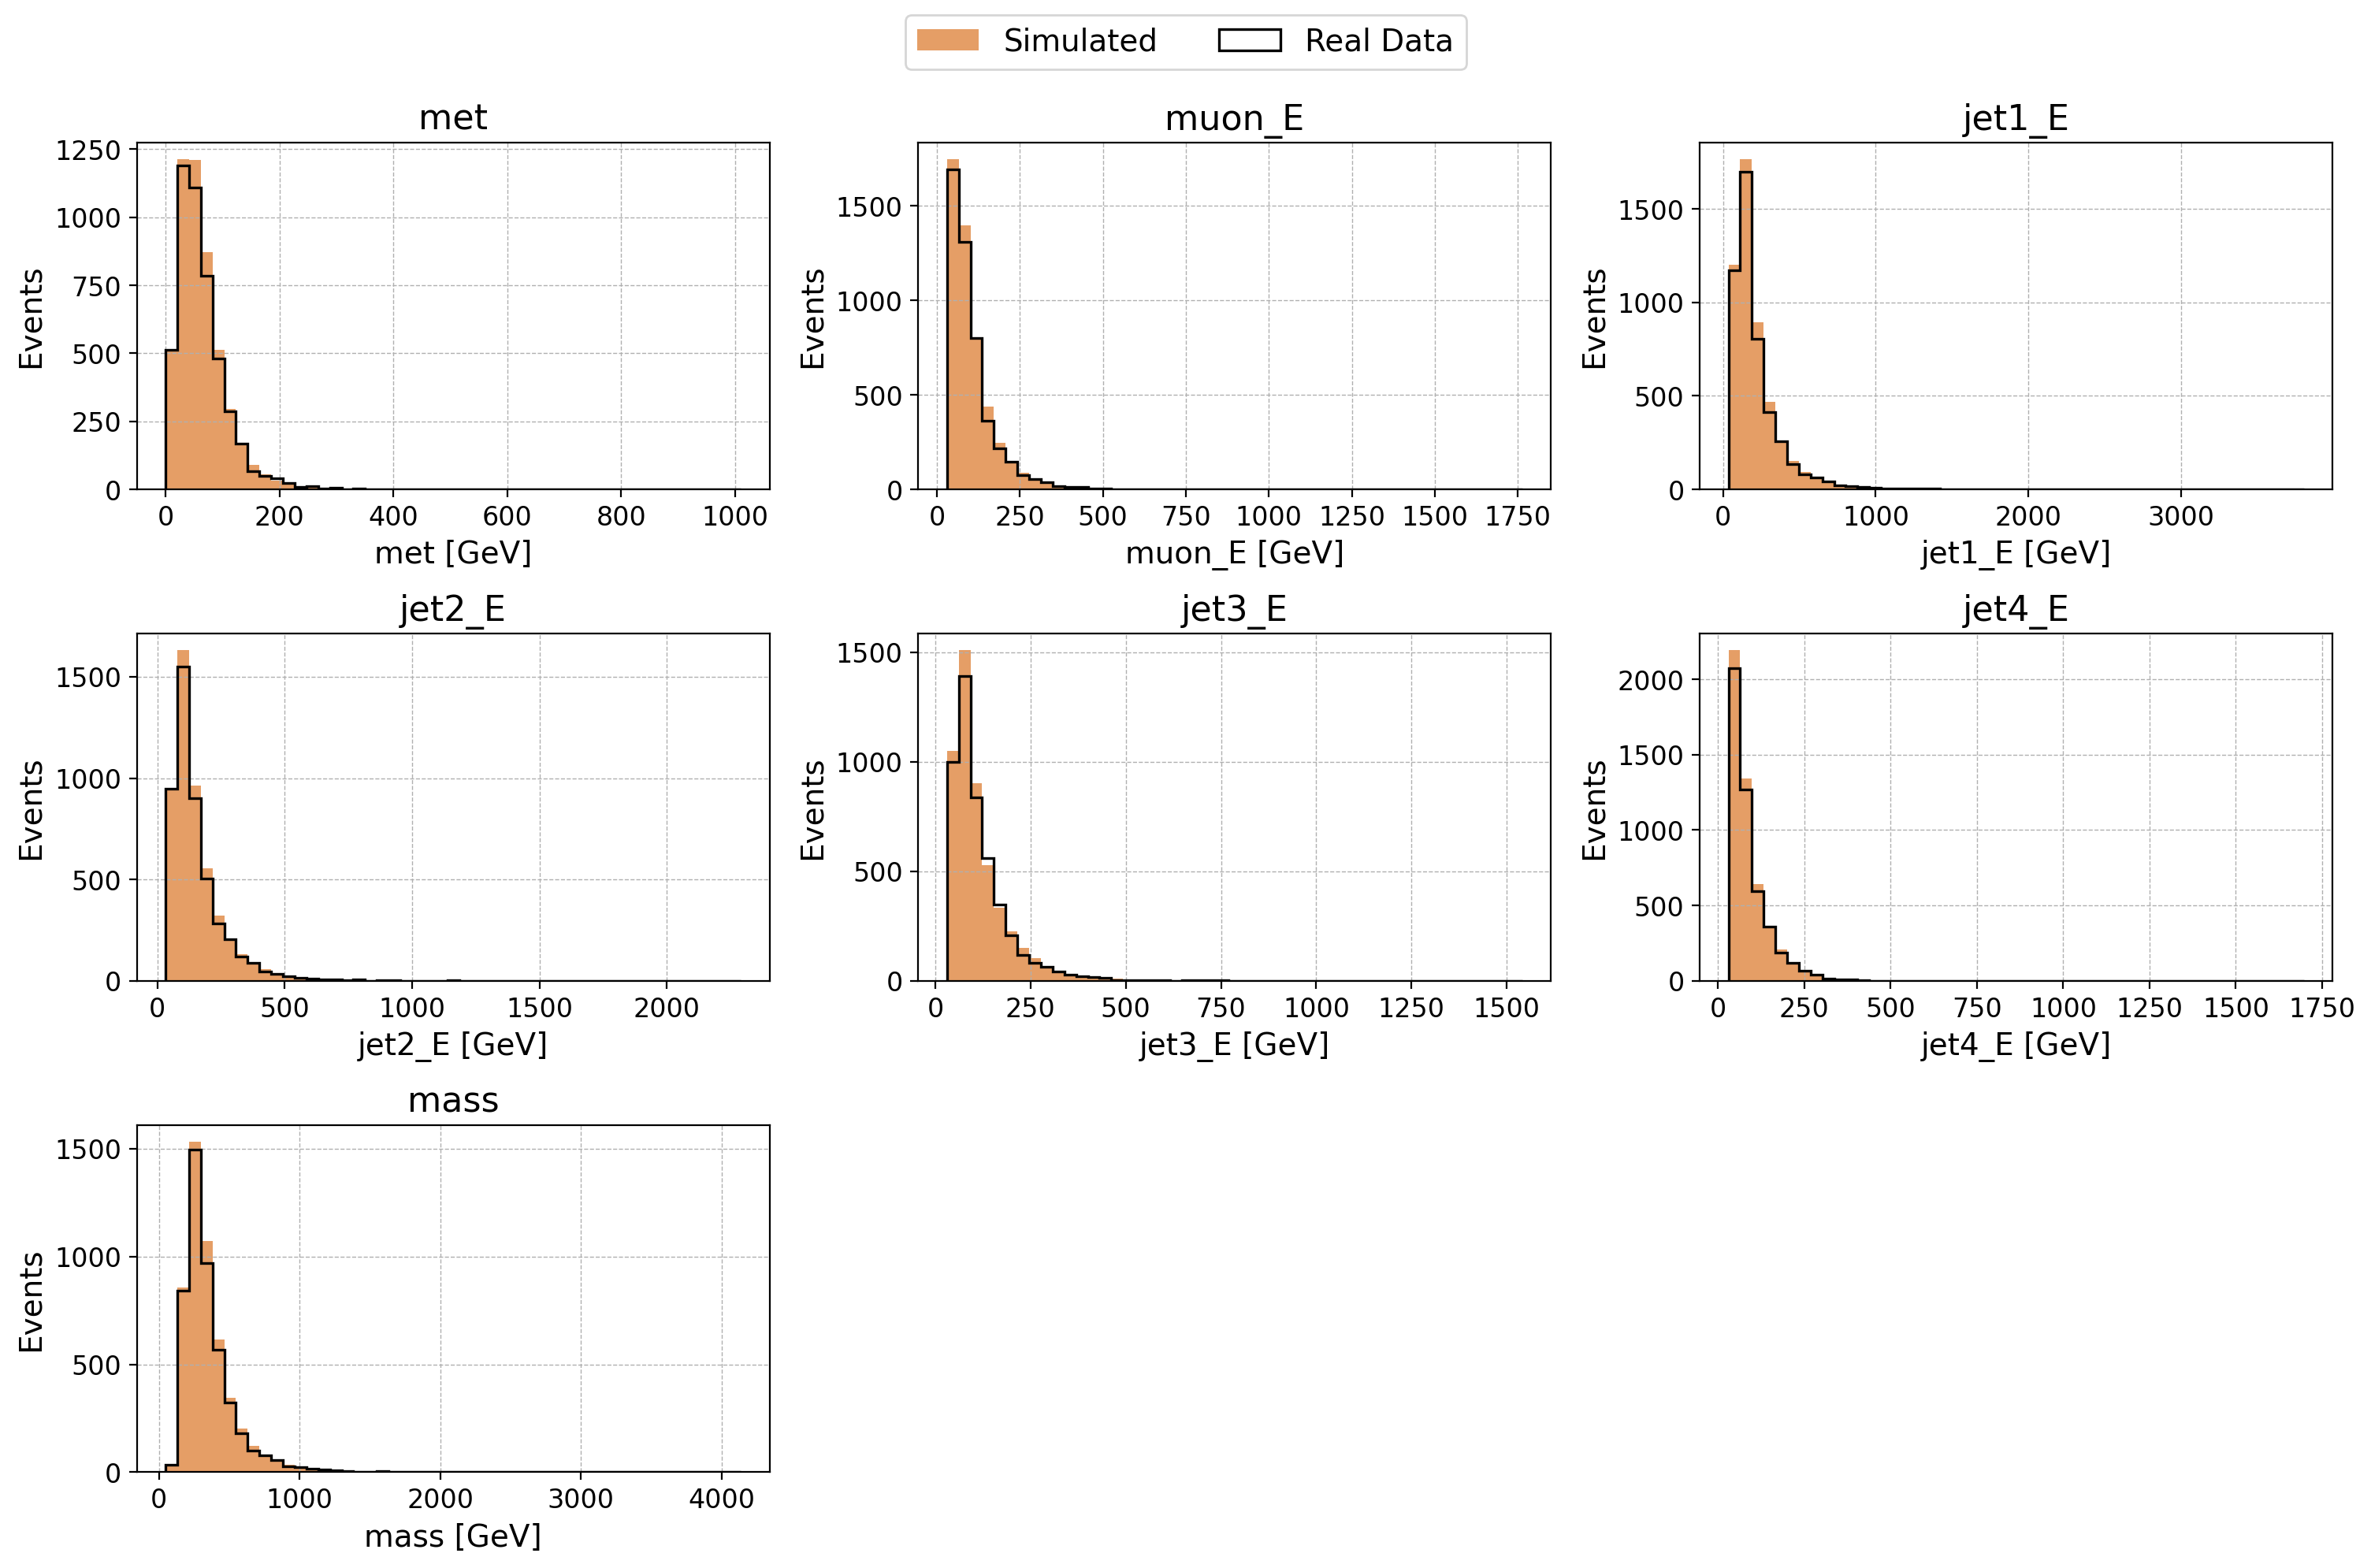

In [84]:
# List of features to plot
features_to_plot = ['met', 'muon_E', 'jet1_E', 'jet2_E', 'jet3_E', 'jet4_E', 'mass']

# Real and simulated events
real_data = df_bjets[df_bjets['label'] == 0]
simulated_data = df_bjets[df_bjets['label'] > 0]

fig, axes = plt.subplots(3, 3, figsize=(15, 10), dpi=200)
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # remove mass = 0 cases
    if feature == 'mass':
        real_features = real_data[real_data['mass'] > 0][feature]
        sim_features = simulated_data[simulated_data['mass'] > 0][feature]
        sim_weights = simulated_data[simulated_data['mass'] > 0]['weight']
    else:
        real_features = real_data[feature]
        sim_features = simulated_data[feature]
        sim_weights = simulated_data['weight']
    
    # Ensure the binning is the same for both histograms
    minval = min(real_features.min(), sim_features.min())
    maxval = max(real_features.max(), sim_features.max())
    bins = np.linspace(minval, maxval, 50)

    ax = axes[i]
    ax.hist(sim_features, bins=bins, weights=sim_weights, alpha=0.6, label="Simulated", color="#D55E00", histtype='stepfilled')
    ax.hist(real_features, bins=bins, histtype='step', color='black', label="Real Data", linewidth=1.2)
    

    # Formatting the plot
    ax.set_xlabel(f"{feature} [GeV]", fontsize=14)
    ax.set_ylabel("Events", fontsize=14)
    ax.set_title(feature, fontsize=16)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)


fig.delaxes(axes[-1])
fig.delaxes(axes[-2])


# Formatting the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=14, ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<hr style="border:2px solid gray">
<a id='q2'></a>

<div style="background-color: #FFEEEC">

# QUESTION 3 [^](#outline)
    
[TOTAL MARKS 33]

<div style="background-color: #FFEEEC">

## QUESTION 3.1 [^](#outline)

Your CMS colleagues would like you to determine how well the simulation that you are provided describes the real data. They are particularly interested in the invariant mass feature that you calculated in Question 1, as this variable is known to be very useful in the analysis of `ttbar` events. 

Throughout Question 3, use the new data frame that you obtained from Question 2.1 part (v). 

(i) Determine the total event count for each of the following in your new data frame. 
   * (a) Real data events 
   * (b) Simulated events from the `ttbar` process
   * (c) Simulated events from other processes. 

Remember to account for the weights when determining these numbers. 

(ii) Make a 1D histogram of the mass feature for real data, and another for simulated events, for events in your new data frame in the range 100 to 1500 GeV. The values in each bin should be the sum of weights for events in that bin, not the density. Overlay both histograms on the same axis. Make sure the real data and simulation use the same binning. You should ensure that there is no bin that has no simulated events in it. Remember to account for the weights in the simulated data. 

(iii) Calculate the value of the $\chi^{2}$ test-statistic for the binned data you obtained in part (ii). For the predicted values, you should use the sum of weights for the simulation in each bin, and for the observations, use the number of real data events in each bin. Assume that the only uncertainty in each bin is the statistical uncertainty. Assume this uncertainty to be $\sqrt{W}$ for each bin, where $W$ is the sum of weights of the simulated events in that bin. 

(iv) What would you expect this value to be, given the number of bins you have used, if the simulation were a good description of the data? Give your reasoning for this and under which conditions this reasoning is valid. 

(v) Using random number generation, estimate and plot the probability density of the $\chi^{2}$ test-statistic assuming that the simulation provides the true description of the data. Under this assumption, the number of observed events in each bin will be distributed as a Poisson random variable with a Poisson parameter $\lambda=W$, where $W$ is the sum of weights of the simulated events in that bin. Make sure to generate enough random numbers (at least 10000 pseudo-datasets) to obtain a good approximation of the probability density of the $\chi^{2}$ test-statistic. Compare this density to the one you would expect assuming large numbers of events in each bin by plotting the expected probability density on top of your estimated probability density.

(vi) Perform a hypothesis test using the $\chi^{2}$ test-statistic with your binned data. You should ensure the following; 
   * Clearly state your definitions of the null hypothesis ($H_{0}$) and the Type-1 error rate. 
   * Clearly define your critical region and your reasoning for this choice of critical region. 
   * Determine whether or not you would reject the null hypothesis, and your reason for your decision. 

You must not assume a particular distribution for the $\chi^2$ test-statistic under the null hypothesis, but instead estimate it using pseudo-data. 

[18 marks]

In [85]:
#i)

real_data = df_bjets[df_bjets['label'] == 0]
num_real_events = len(real_data)

# Considering the weights for the simulated events
ttbar_events = df_bjets[df_bjets['label'] == 1]
sum_ttbar_weights = ttbar_events['weight'].sum()

background_events = df_bjets[df_bjets['label'] > 1]
sum_background_weights = background_events['weight'].sum()

print(f"Number of real data events: {num_real_events}")
print(f"Sum of weights for ttbar events: {sum_ttbar_weights:.2f}")
print(f"Sum of weights for background events: {sum_background_weights:.2f}")


Number of real data events: 4755
Sum of weights for ttbar events: 4578.36
Sum of weights for background events: 441.56


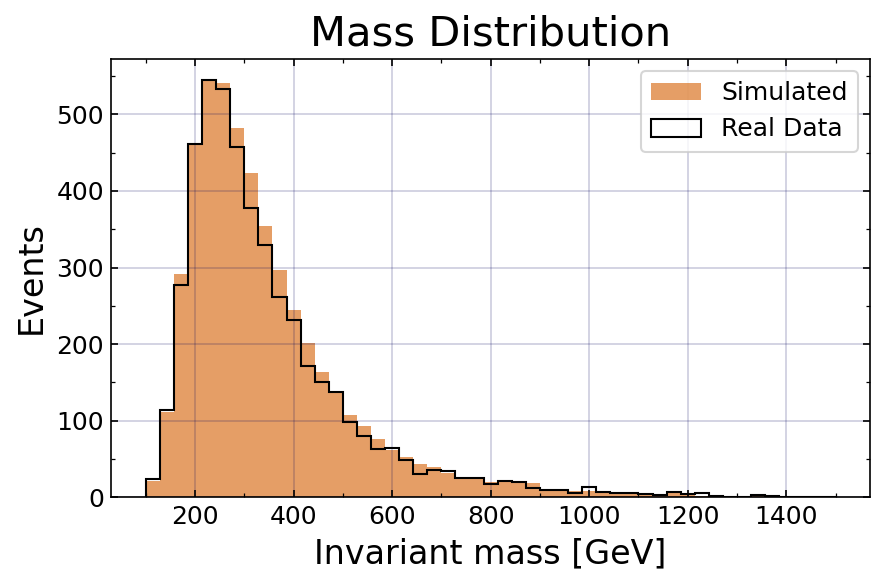

In [ ]:
#ii)


# Mass feature: restrict to 100-1500 GeV
mass_real = real_data[(real_data['mass'] > 100) & (real_data['mass'] < 1500)]['mass']
mass_sim = df_bjets[(df_bjets['label'] > 0) & (df_bjets['mass'] > 100) & (df_bjets['mass'] < 1500)]['mass']
weights_sim = df_bjets[(df_bjets['label'] > 0) & (df_bjets['mass'] > 100) & (df_bjets['mass'] < 1500)]['weight']

bins = np.linspace(100, 1500, 50)


# Plotting the mass distribution
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.hist(mass_sim, bins=bins, weights=weights_sim, alpha=0.6, label='Simulated', color='#D55E00', histtype='stepfilled')
ax.hist(mass_real, bins=bins, histtype='step', color='black', label='Real Data', linewidth=1)
ax.set_xlabel('Invariant mass [GeV]', fontsize=16)
ax.set_ylabel('Events', fontsize=16)
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(which='both', labelsize=12, direction='in', top=True, right=True)
ax.grid(color='xkcd:dark blue', alpha=0.2)
ax.set_title('Mass Distribution', fontsize=20)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
#iii)

O, _ = np.histogram(mass_real, bins=bins)
E, _ = np.histogram(mass_sim, bins=bins, weights=weights_sim)

# Avoid division by zero for when the invariant mass is zero
mask = E > 0
chi2 = np.sum((O[mask] - E[mask])**2 / E[mask])

print(f"Chi-squared statistic: {chi2:.2f}")


Chi-squared statistic: 47.07


iv) If the simulation described the data well, the expected value for the chi-squared test statistic would be equal to the number of degrees of freedom where the number of degrees of freedom is equal to the number of data points minus the number of parameters. In this case, with a histogram, the expected chi-squared test statistic would be 50 - 1 = 49 (number of bins - 1). For this, we assume a large number of events for each bin and that each bin is independent to each other. 

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ac5222\AppData\Local\Temp\ipykernel_21748\604381751.py:15: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi^2$', fontsize=16)
C:\Users\ac5222\AppData\Local\Temp\ipykernel_21748\604381751.py:17: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title('Estimated $\chi^2$ distribution from pseudo-data', fontsize=18)


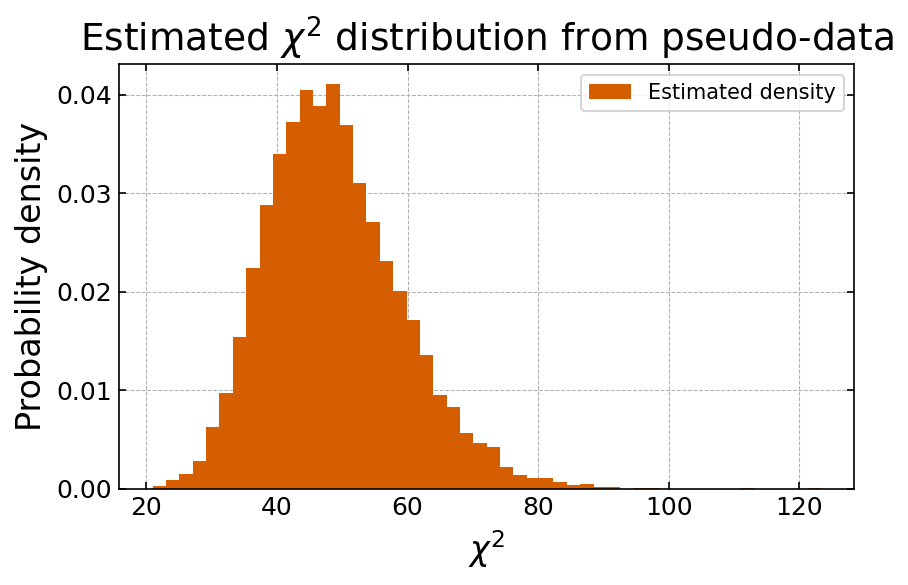

In [91]:
#v)

n_pseudo = 10000
chi2_values = []

for _ in range(n_pseudo):
    pseudo_O = np.random.poisson(lam=E)
    
    chi2_pseudo = np.sum((pseudo_O[mask] - E[mask])**2 / E[mask])
    chi2_values.append(chi2_pseudo)


fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=150)
ax.hist(chi2_values, bins=50, density=True, color="#D55E00", label='Estimated density')
ax.set_xlabel('$\chi^2$', fontsize=16)
ax.set_ylabel('Probability density', fontsize=16)
ax.set_title('Estimated $\chi^2$ distribution from pseudo-data', fontsize=18)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.tick_params(which='both', labelsize=12, direction='in', top=True, right=True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.legend()
plt.show()



vi)  
- Null Hypothesis $(H_{0})$: The simulation is a good description of the data.
- The type-1 error rate is the probability of rejecting the null hypothesis when the null hypothesis is actually true.
- Set the type-1 error rate to be 0.05 (5%), therefore the critical region is the values of chi-squared greater than the 95th percentile of the psuedo data distribution. This value for the type-1 error is industry standard.
- From the code below this is when the chi-squared value is above 67.28
- Our calculated chi-squared test statistic is 47.07. This is below 67.28, therefore we do not reject the null hypothesis. There is insufficient evidence to say that the simulation is not a good description of the data. 



In [ ]:
critical_value = np.percentile(chi2_values, 95)
print(f"Critical value (95% percentile): {critical_value:.2f}")


Critical value (95% percentile): 67.28


<div style="background-color: #FFEEEC">

## QUESTION 3.2 [^](#outline)

You CMS colleagues would like to try using a parametric model to describe the invariant mass distribution in the data. They are especially interested in large values of the mass variable as a prominent theorist has proposed that new particles that are not predicted by the standard model of particle physics could be found hiding in the tails of this invariant mass distribution! 

You are asked to find a parametric function, and its parameter values, that can describe the invariant mass distribution at large enough values. 

Your CMS colleagues propose the following two functions to try, 
   * A power law function $f_p(m;p) = N_p m^{-p}$, where $p>1$. 
   * An exponential function $f_e(m;p) = N_e e^{-mp}$ 

(i) The functions given are not normalised. For a minimum value of the invariant mass $m_{0}$, find the expression for normalisation terms $N_p$ and $N_{e}$ for each function such that $\int_{m_{0}}^{\infty} Nf(m;p) dm = 1$. Note that these terms will depend on both the parameter value $p$, and the value of $m_{0}$. 

(ii) Choose a set of at least 5 values for $m_{0}$ in the range (50, 1500) GeV. For each of these values, 
   * (a) Calculate the maximum likelihood estimates for the parameter $p$ for each function using the real data events where `mass` $>m_{0}$ to specify the likelihood function. 
   * (b) Plot a 1D density histogram of the data you used for part (a) and the two resulting probability density functions using the maximum likelihood estimator for $p$. Remember to make all components of the plots clearly visible and use axis labels and legends as appropriate. 
   * (c) Perform a 1-sample KS-test comparing each of the functions to your data, and report the $p$-value for each test. Note that you will need to use the cumulative distribution function for the power law and exponential to do this. 

(iii) Using your results from part (ii), determine which (if any) combination of $m_{0}$, and choice of function yields a good description of the data. You should clearly specify how you are making this decision in the context of two goodness of fit tests (hypothesis tests where the null hypothesis in each case is one of the two functions). Choose a value of $m_{0}$ that your colleagues should be happy to use as a minimum value of the invariant mass feature so that the distribution can be well modelled by one of these functions. For the function you think best describes the data, calculate the uncertainty on the parameter $p$. You can use any method you like to do this, but you **must clearly explain** how this uncertainty is being calculated. 

[15 marks]

i)

$$
N_{p} = (p-1)m_{0}^{p-1}
$$

$$
N_{e} = pe^{pm_{0}}
$$

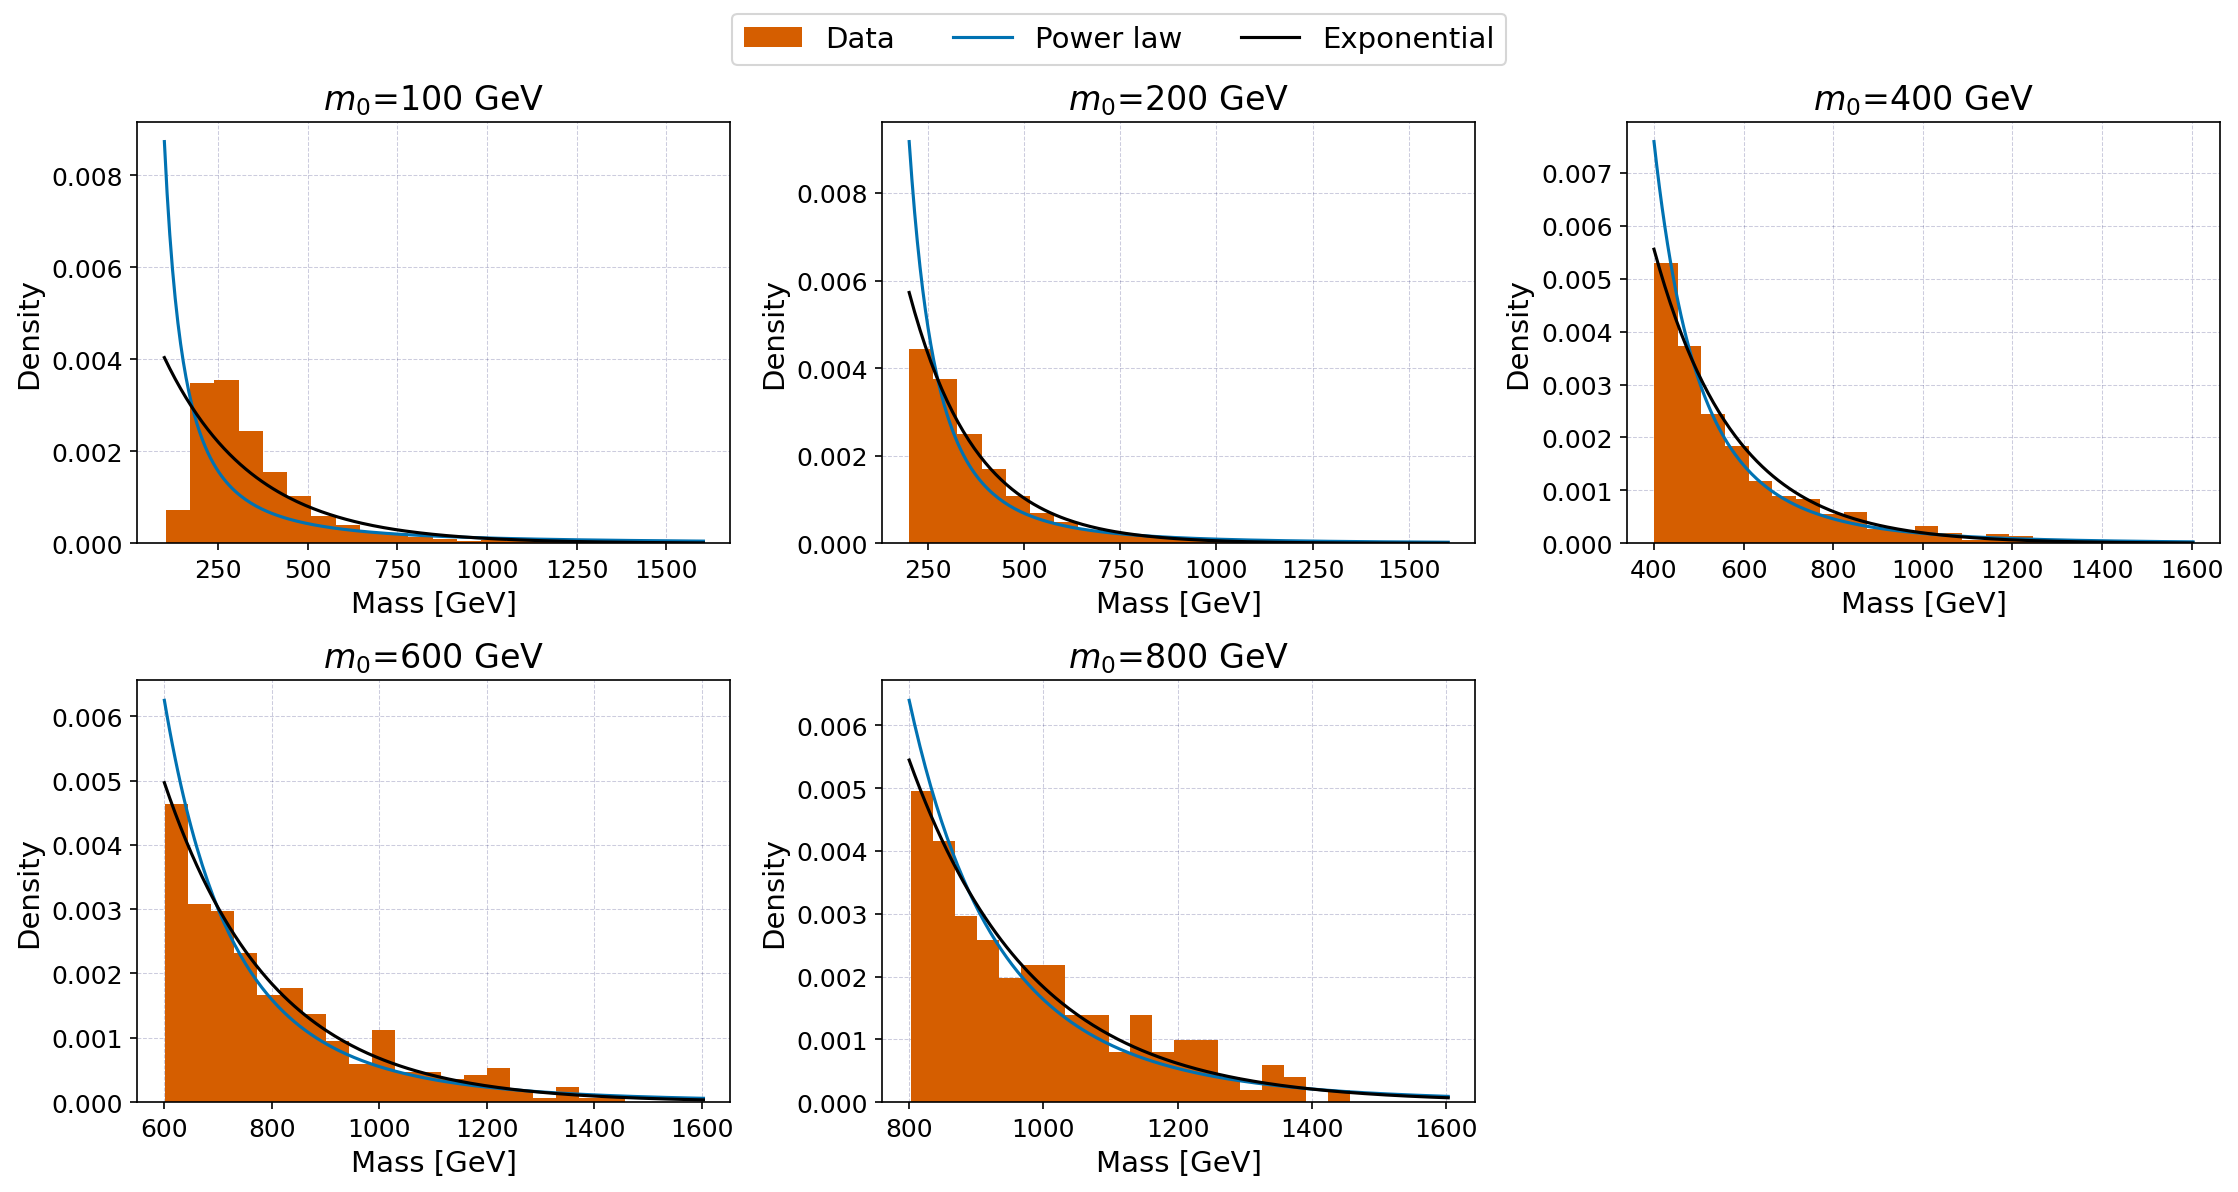

,m0 (GeV),Power-law p,Power-law KS p-value,Exponential p,Exponential KS p-value
0,100,1.873511,0.000000e+00,0.004039,3.858174e-177
1,200,2.835024,1.079949e-49,0.005729,1.112991e-03
2,400,4.036423,1.216776e-02,0.005557,4.387870e-02
3,600,4.749060,9.480553e-03,0.004968,7.025870e-01
4,800,6.119830,9.964405e-02,0.005448,2.993965e-01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

#choosing what m0 values to use 
m0_values = [100, 200, 400, 600, 800]

fig, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=150)
axes = axes.flatten()


results = []
for i, m0 in enumerate(m0_values):
    # Select mass > m0
    data = mass_real[mass_real > m0]
    n = len(data)
    
    if n == 0:
        continue #skip empty data
    
    mean_mass = np.mean(data)
    
    # MLE for power-law
    p_power = 1 + n / np.sum(np.log(data / m0))
    # MLE for exponential
    p_exp = 1 / (mean_mass - m0)
    
    # Normalization constants
    N_power = (p_power - 1) * m0**(p_power - 1)
    N_exp = p_exp * np.exp(p_exp * m0)
    
    # Define model pdfs
    def pdf_power(m): return N_power * m**(-p_power)
    def pdf_exp(m): return N_exp * np.exp(-p_exp * m)
    

    # Plotting
    ax = axes[i]
    ax.hist(data, bins=20, density=True, color="#D55E00", label='Data', zorder=2)
    m_plot = np.linspace(m0, data.max()*1.1, 200)
    ax.plot(m_plot, pdf_power(m_plot), color="#0072B2", label=f'Power law', zorder=3)
    ax.plot(m_plot, pdf_exp(m_plot), color="black", label=f'Exponential', zorder=3)
    ax.set_xlabel('Mass [GeV]', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.set_title(f'$m_0$={m0} GeV', fontsize=16)
    ax.grid(color='xkcd:dark blue', alpha=0.2)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)


    # cdf's needed for ks test
    def cdf_power(m):
        return 1 - (m0 / m) ** (p_power - 1)
    
    def cdf_exp(m):
        return 1 - np.exp(-p_exp * (m - m0))
    
    #doing the ks test
    ks_power = kstest(data, cdf_power)
    ks_exp = kstest(data, cdf_exp)

    results.append({
        'm0 (GeV)': m0,
        'Power-law p': p_power,
        'Power-law KS p-value': ks_power.pvalue,
        'Exponential p': p_exp,
        'Exponential KS p-value': ks_exp.pvalue
    })


# Remove the empty subplots
if len(m0_values) < len(axes):
    for j in range(len(m0_values), len(axes)):
        fig.delaxes(axes[j])


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=14, ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

df_results = pd.DataFrame(results)
display(df_results)

In [ ]:
#iii)

best_m0 = None
best_model = None
best_p_value = -10 
best_p = None
best_p_uncertainty = None


for index, row in df_results.iterrows():
    m0 = row['m0 (GeV)']
    p_power = row['Power-law p']
    ks_p_value_power = row['Power-law KS p-value']
    p_exp = row['Exponential p']
    ks_p_value_exp = row['Exponential KS p-value']

    # Choose the model with the higher KS p-value
    if ks_p_value_power > ks_p_value_exp:
        current_model = 'Power Law'
        current_p = p_power
        current_p_uncertainty = 1 / np.sqrt(len(mass_real[mass_real > m0]))  # Uncertainty approximation
        current_p_value = ks_p_value_power
    else:
        current_model = 'Exponential'
        current_p = p_exp
        current_p_uncertainty = 1 / np.sqrt(len(mass_real[mass_real > m0]))  # Uncertainty approximation
        current_p_value = ks_p_value_exp

    # Check if this is the best m0 so far (highest p-value)
    if current_p_value > best_p_value:
        best_m0 = m0
        best_model = current_model
        best_p_value = current_p_value
        best_p = current_p
        best_p_uncertainty = current_p_uncertainty

# Display the best results
print(f"Best m0: {best_m0} GeV")
print(f"Best model: {best_model}")
print(f"Best p-value: {best_p:.3f}")
print(f"Uncertainty on p: {best_p_uncertainty:.3f}")



Best m0: 600.0 GeV
Best model: Exponential
Best p-value: 0.005
Uncertainty on p: 0.050


<b><u>Explanations</b></u>:

- We chose the model with the highest KS p-value. A high KS p-value shows that the observed and the predicted distribution match well. The p-value itself says that if the sample actually came from the given distribution, there is a p% probability that a random sample would have a D-value at least this large (or an even worse fit). Therefore, we chose the model with the highest p-value
- The uncertainty calculation comes from using the maximum likelihood estimator. The uncertainty can be approximated to be the inverse of the square root of the sample size



<hr style="border:2px solid gray">
<a id='q2'></a>

# End of morning session questions 